# **📌 Extracción(E - Extract)**

In [3]:
import json
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving TelecomX_Data.json to TelecomX_Data.json


In [5]:
import io

data = json.load(io.BytesIO(uploaded['TelecomX_Data.json']))

In [6]:
df = pd.json_normalize(
    data,
    sep='.',
    record_prefix=None
)

# 1. Eliminar espacios en blanco en toda la columna (en caso de que haya strings vacíos o espacios)
df['account.Charges.Total'] = df['account.Charges.Total'].str.strip()

# 2. Reemplazar valores vacíos '' por NaN
df['account.Charges.Total'] = df['account.Charges.Total'].replace('', pd.NA)

# 3. Convertir a tipo float
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 4. Verificar tipo final
print("Tipo de dato final:", df['account.Charges.Total'].dtype)
print("Valores nulos tras conversión:", df['account.Charges.Total'].isna().sum())

Tipo de dato final: float64
Valores nulos tras conversión: 11


In [7]:
print(df.shape)
df.head()

(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# **🔧 Transformación (T - Transform)**

In [8]:
# Ver tipos de datos y valores no nulos
print("Tipos de datos y valores no nulos:")
print(df.info())


Tipos de datos y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tech

In [9]:
# Resumen de columnas categóricas
print("\nResumen categórico:")
print(df.describe(include=['object', 'bool']))


Resumen categórico:
        customerID Churn customer.gender customer.Partner customer.Dependents  \
count         7267  7267            7267             7267                7267   
unique        7267     3               2                2                   2   
top     9995-HOTOH    No            Male               No                  No   
freq             1  5174            3675             3749                5086   

       phone.PhoneService phone.MultipleLines internet.InternetService  \
count                7267                7267                     7267   
unique                  2                   3                        3   
top                   Yes                  No              Fiber optic   
freq                 6560                3495                     3198   

       internet.OnlineSecurity internet.OnlineBackup  \
count                     7267                  7267   
unique                       3                     3   
top                         No    

In [10]:
# Resumen estadístico de columnas numéricas
print("\nResumen estadístico (numéricas):")
print(df.describe())


Resumen estadístico (numéricas):
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       account.Charges.Total  
count            7256.000000  
mean             2280.634213  
std              2268.632997  
min                18.800000  
25%               400.225000  
50%              1391.000000  
75%              3785.300000  
max              8684.800000  


In [11]:
# 1. Lista de variables del diccionario
variables_diccionario = [
    "customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
    "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "Charges.Monthly", "Charges.Total"
]


In [12]:
# Construcción del diccionario extendido
diccionario_extendido = set(variables_diccionario + [var.split('.')[-1] for var in variables_diccionario])

# 2. Comparar con las columnas del DataFrame
print("Columnas en el DataFrame vs. Diccionario:")
for col in df.columns:
    col_simple = col.split('.')[-1]
    if col_simple in diccionario_extendido:
        print(f"✅ {col} -> Corresponde a '{col_simple}' en el diccionario")
    else:
        print(f"❌ {col} -> No está en el diccionario")

Columnas en el DataFrame vs. Diccionario:
✅ customerID -> Corresponde a 'customerID' en el diccionario
✅ Churn -> Corresponde a 'Churn' en el diccionario
✅ customer.gender -> Corresponde a 'gender' en el diccionario
✅ customer.SeniorCitizen -> Corresponde a 'SeniorCitizen' en el diccionario
✅ customer.Partner -> Corresponde a 'Partner' en el diccionario
✅ customer.Dependents -> Corresponde a 'Dependents' en el diccionario
✅ customer.tenure -> Corresponde a 'tenure' en el diccionario
✅ phone.PhoneService -> Corresponde a 'PhoneService' en el diccionario
✅ phone.MultipleLines -> Corresponde a 'MultipleLines' en el diccionario
✅ internet.InternetService -> Corresponde a 'InternetService' en el diccionario
✅ internet.OnlineSecurity -> Corresponde a 'OnlineSecurity' en el diccionario
✅ internet.OnlineBackup -> Corresponde a 'OnlineBackup' en el diccionario
✅ internet.DeviceProtection -> Corresponde a 'DeviceProtection' en el diccionario
✅ internet.TechSupport -> Corresponde a 'TechSupport' 

In [13]:
columnas_relevantes = [
    'Churn',                     # Target
    'customer.SeniorCitizen',    # ¿Clientes mayores abandonan más?
    'customer.tenure',           # Antigüedad
    'internet.InternetService',  # Tipo de servicio (DSL/Fiber optic)
    'account.Contract',          # Tipo de contrato
    'account.Charges.Monthly'    # Costo mensual
]
df_churn = df[columnas_relevantes].copy()


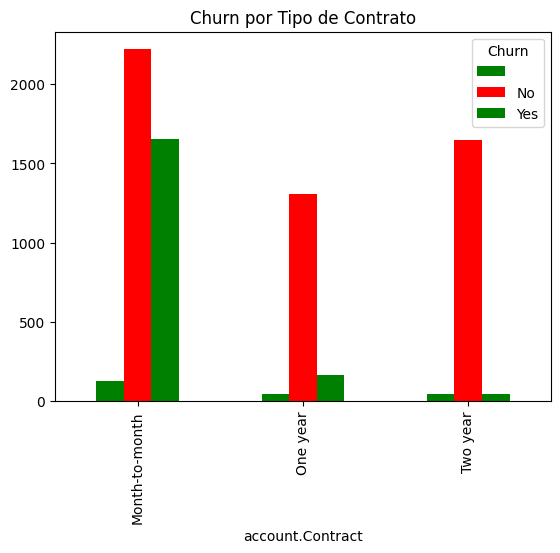

In [14]:
import matplotlib.pyplot as plt

# Gráfico de barras: Churn por tipo de contrato
df_churn.groupby('account.Contract')['Churn'].value_counts().unstack().plot(
    kind='bar',
    color=['green', 'red'],
    title='Churn por Tipo de Contrato'
)
plt.show()


### Comprobación de incoherencias en los datos

In [15]:
# 1. Ver cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. Ver porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos:")
print(df.isnull().mean() * 100)

# 3. Verificar duplicados
print("\nCantidad de registros duplicados:")
print(df.duplicated().sum())

# 4. Ver tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 5. Ver muestras de categorías para detectar inconsistencias
print("\nValores únicos en columnas clave:")
print("\nChurn:", df['Churn'].unique())
print("\nContract:", df['account.Contract'].unique())
print("\nPaymentMethod:", df['account.PaymentMethod'].unique())
print("\nInternetService:", df['internet.InternetService'].unique())

# 6. Revisar si 'Total Charges' está bien tipado
print("\nEjemplo de valores en 'account.Charges.Total':")
print(df['account.Charges.Total'].head())

Valores nulos por columna:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

Porcentaje de valores nulos:
customerID                   0.000000
Churn                        0.000000
customer.gender              0.000000
customer.SeniorCitizen       0.000000
customer.Partner             0.000000
customer.Dependents          0.000000
customer.tenure              0

### Manejo de inconsistencias

In [16]:
# 1. Eliminar registros donde 'Churn' está vacío
df = df[df['Churn'].str.strip() != '']

# 2. Convertir a numérico
df.loc[:, 'account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 3. Eliminar registros donde 'Total Charges' es NaN
df = df[df['account.Charges.Total'].notnull()]

# 4. Normalizar categorías
for col in ['Churn', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']:
    df.loc[:, col] = df[col].str.strip()

# 5. Verificación final
print("Valores nulos totales:", df.isnull().sum().sum())
print("Duplicados:", df.duplicated().sum())
print("Tipo de 'account.Charges.Total':", df['account.Charges.Total'].dtype)
print("Valores únicos en 'Churn':", df['Churn'].unique())


Valores nulos totales: 0
Duplicados: 0
Tipo de 'account.Charges.Total': float64
Valores únicos en 'Churn': ['No' 'Yes']


### Columna de cuentas diarias

In [17]:
# Crear columna 'Cuentas_Diarias' dividiendo la facturación mensual por 30 días
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Verificar que la nueva columna fue creada correctamente
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())


   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


# **📊 Carga y análisis(L - Load & Analysis)**

### Distribución de evasión

Distribución de valores en la columna 'Churn':
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Porcentaje:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-3872342289.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['green', 'red'])


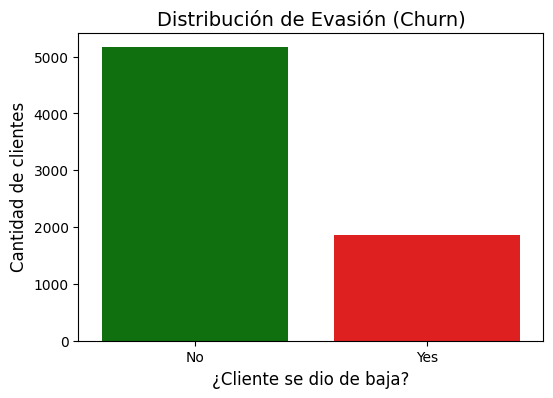

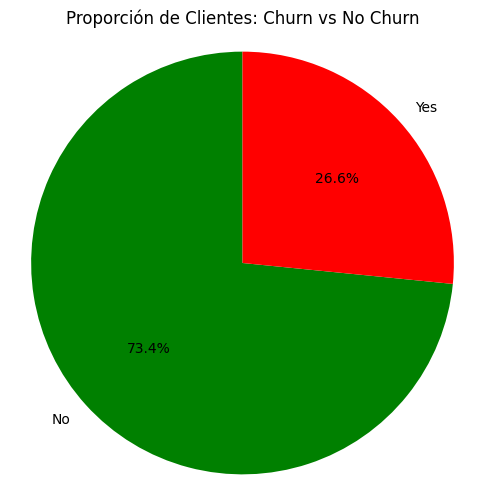

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabla resumen
print("Distribución de valores en la columna 'Churn':")
print(df['Churn'].value_counts())
print("\nPorcentaje:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Gráfico de barras (countplot) para distribución de evasión
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette=['green', 'red'])

plt.title('Distribución de Evasión (Churn)', fontsize=14)
plt.xlabel('¿Cliente se dio de baja?', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.show()

# Pie chart
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Proporción de Clientes: Churn vs No Churn')
plt.axis('equal')
plt.show()


### Recuento de evasión por variables categóricas


📊 Recuento de 'Churn' por 'customer.gender':

Churn              No  Yes
customer.gender           
Female           2544  939
Male             2619  930

Porcentaje por categoría:
Churn              No   Yes
customer.gender            
Female           73.0  27.0
Male             74.0  26.0

📊 Recuento de 'Churn' por 'account.Contract':

Churn               No   Yes
account.Contract            
Month-to-month    2220  1655
One year          1306   166
Two year          1637    48

Porcentaje por categoría:
Churn               No   Yes
account.Contract            
Month-to-month    57.0  43.0
One year          89.0  11.0
Two year          97.0   3.0

📊 Recuento de 'Churn' por 'account.PaymentMethod':

Churn                        No   Yes
account.PaymentMethod                
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308

Porcentaje por categoría:
Churn                        No  

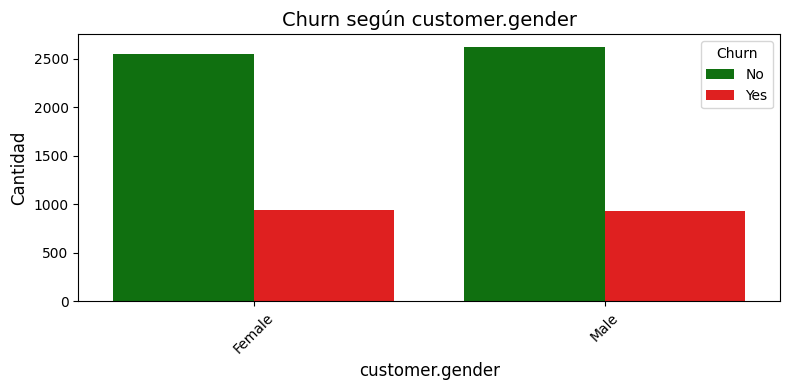

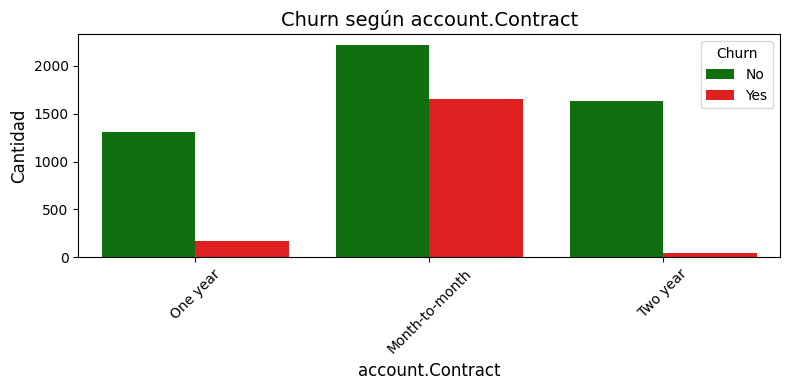

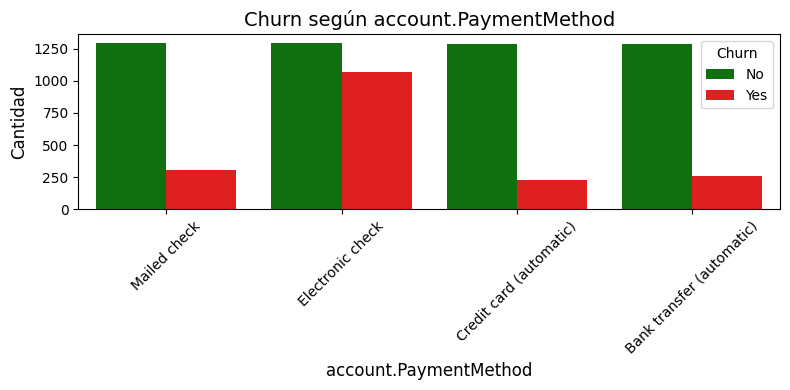

In [20]:
# Lista de variables categóricas que queremos analizar
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for var in categorical_vars:
    print(f"\n📊 Recuento de 'Churn' por '{var}':\n")

    # Tabla cruzada (frecuencia absoluta)
    tabla = pd.crosstab(df[var], df['Churn'])
    print(tabla)

    # Tabla cruzada (porcentaje por fila)
    print("\nPorcentaje por categoría:")
    print(tabla.div(tabla.sum(axis=1), axis=0).round(2) * 100)


# Variables categóricas para analizar
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='Churn', data=df, palette=['green', 'red'])
    plt.title(f'Churn según {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


### Conteo de evasión por variables numéricas

Resumen estadístico de Total Gastado según Churn:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


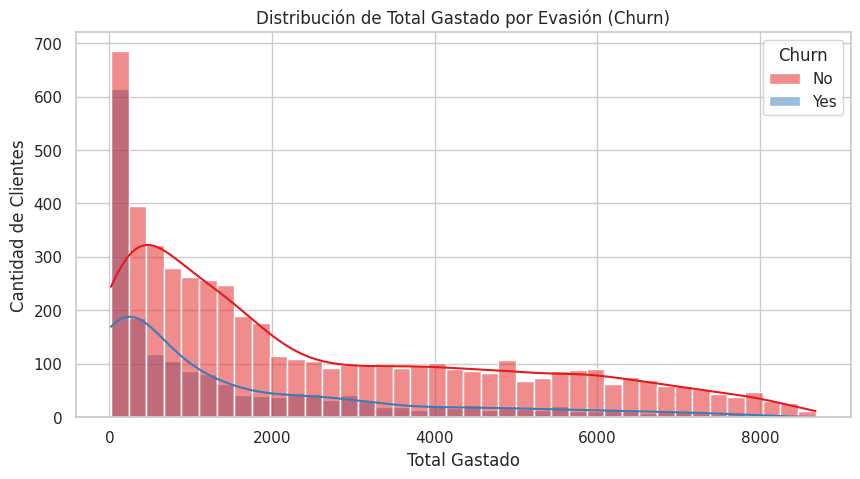

/tmp/ipython-input-2291461717.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='Set3')


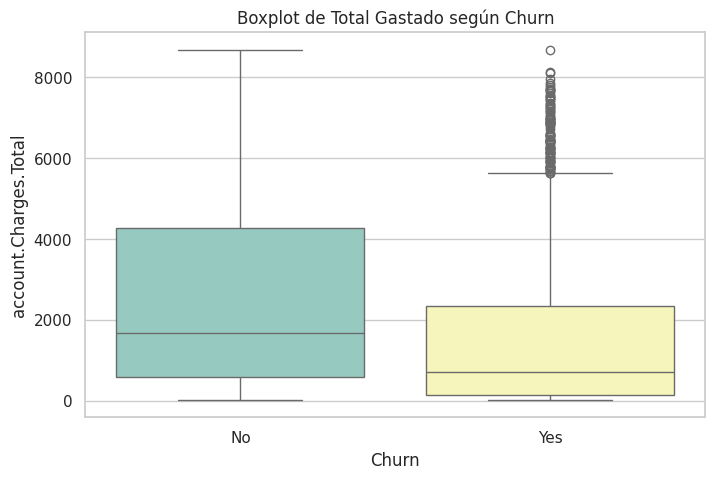

In [21]:
sns.set(style="whitegrid")

# ----------- COLUMNA: account.Charges.Total -----------

print("Resumen estadístico de Total Gastado según Churn:")
print(df.groupby("Churn")["account.Charges.Total"].describe())

# Histograma de distribución del total gastado
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='account.Charges.Total', hue='Churn', bins=40, kde=True, palette='Set1')
plt.title("Distribución de Total Gastado por Evasión (Churn)")
plt.xlabel("Total Gastado")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Boxplot para visualizar dispersión
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='Set3')
plt.title("Boxplot de Total Gastado según Churn")
plt.show()


Resumen estadístico de Antigüedad del Cliente (tenure) según Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


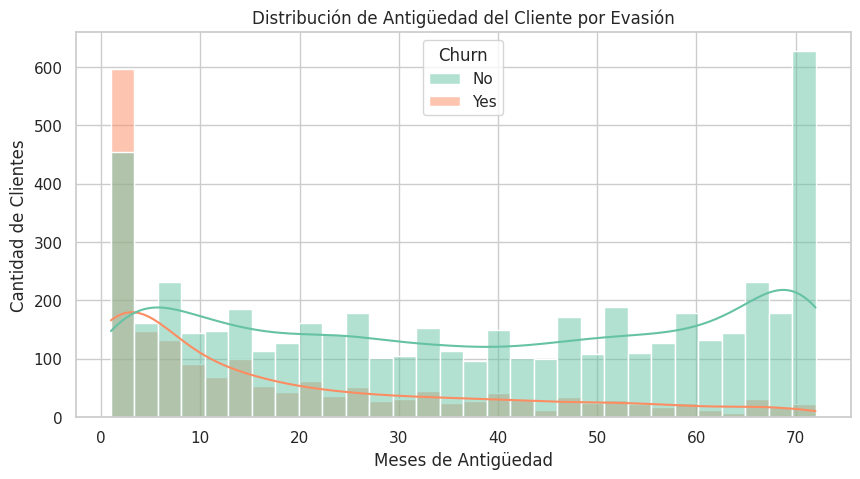

/tmp/ipython-input-2561571728.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='Set2')


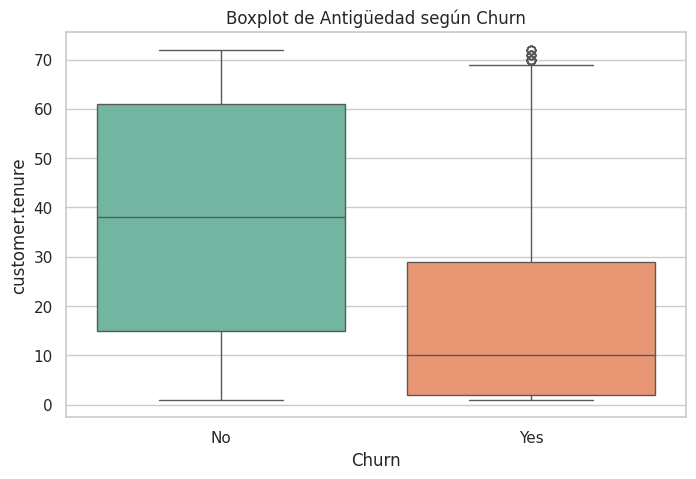

In [22]:
# ----------- COLUMNA: customer.tenure -----------

print("\nResumen estadístico de Antigüedad del Cliente (tenure) según Churn:")
print(df.groupby("Churn")["customer.tenure"].describe())

# Histograma de distribución de la antigüedad del cliente
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='customer.tenure', hue='Churn', bins=30, kde=True, palette='Set2')
plt.title("Distribución de Antigüedad del Cliente por Evasión")
plt.xlabel("Meses de Antigüedad")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Boxplot para tenure
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='Set2')
plt.title("Boxplot de Antigüedad según Churn")
plt.show()
